# AI Mentions — Full Text Analysis
This notebook analyzes matches produced by `scripts/detect_ai_mentions_fulltext.py` (scanning `adve_text_adve` from 2005 onward).

In [132]:
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
try:
    import seaborn as sns; sns.set_context('talk')
except Exception:
    sns = None

ROOT = Path.cwd().parents[1]
MATCH_PATH = ROOT / 'Results Datasets' / 'ai_mentions' / 'ai_keyword_matches_fulltext.json'
print('Reading', MATCH_PATH)
data = json.loads(MATCH_PATH.read_text(encoding='utf-8'))
len(data)

Reading /Users/miguel/Documents/Master Thesis/Thesis/Results Datasets/ai_mentions/ai_keyword_matches_fulltext.json


15

In [136]:
len(df['ad_id'].unique())

615

In [119]:
grouped_df = df.groupby('ad_id')[['keyword','snippet']].agg(tuple)
grouped_df = grouped_df.map(lambda x: tuple(set(x)))
grouped_df

,keyword,snippet
ad_id,,
sjmm_suf-2-02-2020-03-00046-0-000002847,"(robotik,)","(schinen, Kupplungssysteme und «Robotik». Welt..."
sjmm_suf-2-02-2020-03-00116-0-000003430,"(nlp, reinforcement learning, collaborative fi...",(achine learning and federated «machine learni...
sjmm_suf-2-02-2020-03-00137-0-000004309,"(robotik,)",(äte & Werkzeuge\nMechatronik & «Robotik»\nSof...
sjmm_suf-2-02-2020-03-00137-0-000004311,"(robotik,)",(ojektleiter / Projektleiterin «Robotik»\n\nSt...
sjmm_suf-2-02-2020-03-00137-0-000004312,"(robotik,)",(äte & Werkzeuge\nMechatronik & «Robotik»\nSof...
...,...,...
sjmm_suf-3-01-2024-03-09019-1-055826811,"(machine learning, predictive modeling)","(ologies (predictive modeling, «machine learni..."
sjmm_suf-3-01-2024-03-09019-1-055826855,"(ai,)",(n using sensor technology and «AI» based algo...
sjmm_suf-3-01-2024-03-09019-1-055842847,"(machine learning,)",(ty to the ticketing business («machine learni...


In [128]:
grouped_df_filtered = grouped_df[grouped_df['keyword'].map(lambda x: len(x)==1)].reset_index()
grouped_df_filtered_2 = grouped_df_filtered.groupby(['keyword']).agg({'ad_id':'count','snippet':'sum'}).reset_index()
for x in grouped_df_filtered_2.itertuples():
    print(x.keyword,x.snippet)

('ai',) ('AI / AA / AM à 50%\n\nExpert(e) «AI» / AA / AM à 50%\nLausanne\nFaço', "n pour l'assurance-invalidité «AI» et l'assurance-accident AA/AM", "n pour l'assurance-invalidité «AI»/ AA et AM. Vous évaluez des c", "lien avec l'activité d'expert «AI»/AA\n\tBrevet Fédéral en assuran", 'Expert(e) «AI» / AA / AM à 50%\n\nExpert(e) AI', 'ensure registerability of the «AI» in line with the business pla', 'e projects. Plan and initiate «AI» studies deriving from data ca', 'er for the Active Ingredient («AI») Maintenance projects. Plan a', 'tionnaire des prestations AVS-«AI» (100%)\nVos missions\n\tRenseign', 'stionnaire des prestationsAVS-«AI»(100%)\n\nVous avez l’ambition d', ' prestations de l’AVS et de l’«AI»\n\tAnalyser et traiter les dema', 'suivi des dossiers de demande «AI».  Vous participerez aussi à l', 'estations complémentaires AVS/«AI», subside pour l’assurance-mal', 'SEO, le CGPI, le chômage ou l’«AI».\nSi vous souhaitez postuler p', 'ux prestations sociales (AVS, «AI», chômag

In [93]:
set(grouped_df_filtered.map(lambda x: x[0]))

{'ai',
 'airflow',
 'algorithm development',
 'artificial intelligence',
 'autonomes fahren',
 'autonomous driving',
 'bayesian network',
 'chatbot',
 'chatbots',
 'data mining',
 'deep learning',
 'gan',
 'intelligent automation',
 'jax',
 'ki',
 'llm',
 'machine learning',
 'machine-learning',
 'maschinelles lernen',
 'mistral',
 'ml',
 'mlops',
 'modal',
 'nlp',
 'online learning',
 'opencv',
 'predictive analytics',
 'predictive maintenance',
 'predictive modelling',
 'robotics',
 'robotik',
 'spracherkennung',
 'svm',
 'text mining',
 'topic modeling',
 'transformers'}

In [135]:
# Flatten year → ad → matches into a DataFrame
rows = []
for year, ads in data.items():
    for ad_id, matches in ads.items():
        for m in matches:
            rows.append({
                'year': int(year),
                'ad_id': ad_id,
                'keyword': m.get('keyword'),
                'source': m.get('folder', 'fulltext'),
                'snippet': m.get('text', '')
            })
df = pd.DataFrame(rows)
df.sort_values(by=['year'])

,year,ad_id,keyword,source,snippet
0,2010,sjmm_suf-1-01-2010-03-05108-0-000000001,robotik,fulltext,le Zahnräder und Getriebe für die Medizin und ...
26,2010,sjmm_suf-2-01-2010-03-00680-0-000002102,data mining,fulltext,"collections processes,- Knowledge of statisti..."
25,2010,sjmm_suf-2-01-2010-03-01270-0-000001790,algorithmus-entwicklung,fulltext,dungen gemacht.\nIdealerweise haben Sie bereit...
24,2010,sjmm_suf-2-01-2010-03-01270-0-000001774,text mining,fulltext,klungsprojekten in den Bereichen Data-Warehous...
23,2010,sjmm_suf-2-01-2010-03-00354-0-000001384,intelligente systeme,fulltext,iesen.\nBasierend auf modernsten Komponenten r...
...,...,...,...,...,...
1327,2024,sjmm_suf-2-05-2024-03-05721-1-000366992,ai,fulltext,usses on solving complex business problems usi...
1326,2024,sjmm_suf-2-05-2024-03-05710-1-000349856,llms,fulltext,emonstrate how generative artificial intellige...
1325,2024,sjmm_suf-2-05-2024-03-05710-1-000349856,llm,fulltext,emonstrate how generative artificial intellige...
1343,2024,sjmm_suf-2-05-2024-03-05721-1-000366992,langchain,fulltext,XA GenAI Community and work with technology co...


In [52]:
for x in df.query("keyword == 'ner'").itertuples():
    print(x.year, x.snippet)

In [137]:
# Overview
total_ads = df['ad_id'].nunique()
total_mentions = len(df)
unique_keywords = df['keyword'].nunique()
print(f'Ads with ≥1 match: {total_ads:,}')
print(f'Total keyword mentions: {total_mentions:,}')
print(f'Unique keywords matched: {unique_keywords}')
print(df['keyword'].value_counts())

Ads with ≥1 match: 615
Total keyword mentions: 1,549
Unique keywords matched: 104
keyword
ai                         319
machine learning           252
robotics                   127
robotik                    112
ml                          64
                          ... 
bayesian network             1
autonomous driving           1
collaborative filtering      1
genetic algorithm            1
question answering           1
Name: count, Length: 104, dtype: int64


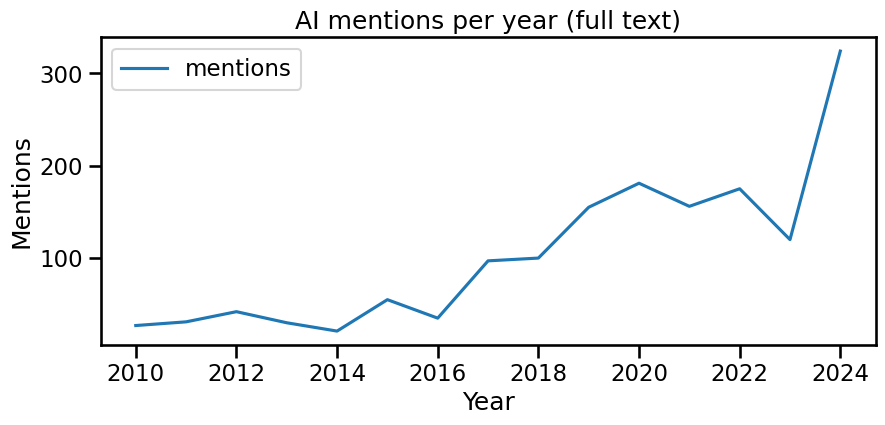

,year,mentions
0,2010,27
1,2011,31
2,2012,42
3,2013,30
4,2014,21
5,2015,55
6,2016,35
7,2017,97
8,2018,100
9,2019,155


In [141]:
# Mentions per year
per_year = df.groupby('year').size().rename('mentions').reset_index()
ax = per_year.plot(x='year', y='mentions', figsize=(10,4), title='AI mentions per year (full text)')
ax.set_xlabel('Year'); ax.set_ylabel('Mentions'); plt.show()
per_year

keyword
ai                             195
machine learning               166
robotik                         57
robotics                        55
ml                              51
artificial intelligence         46
deep learning                   27
generative ai                   24
künstliche intelligenz          22
kuenstliche intelligenz         22
natural language processing     21
nlp                             14
modal                           13
llm                             12
tensorflow                      12
computer vision                 12
data mining                     12
ki                              11
genai                            9
predictive maintenance           8
keras                            8
maschinelles lernen              7
pytorch                          7
spracherkennung                  6
ml models                        6
mistral                          6
neural networks                  6
opencv                           5
intelligent 

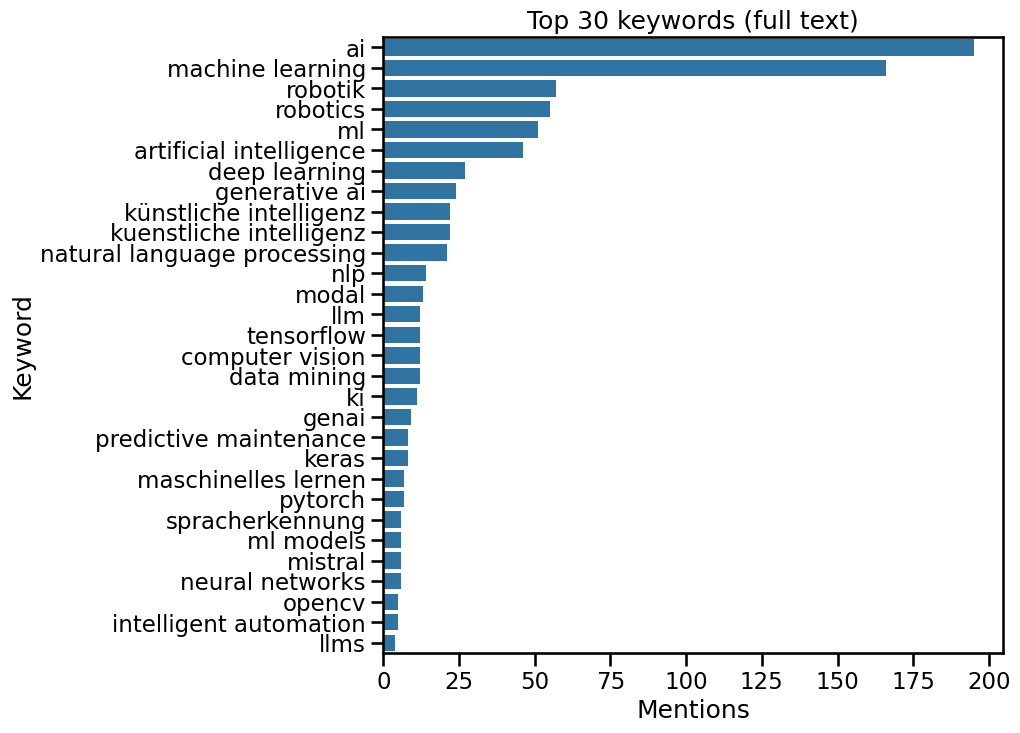

In [55]:
# Top keywords overall
top_kw = df['keyword'].value_counts().head(30)
print(top_kw)
if sns is not None:
    plt.figure(figsize=(8,8))
    sns.barplot(x=top_kw.values, y=top_kw.index, orient='h')
    plt.title('Top 30 keywords (full text)'); plt.xlabel('Mentions'); plt.ylabel('Keyword')
    plt.show()


In [11]:
# Sample snippets for manual QA
sample = df.sample(min(10, len(df)), random_state=42) if len(df) else df
sample[['year','ad_id','keyword','snippet']].head(10)

,year,ad_id,keyword,snippet
950,2022,sjmm_suf-2-05-2022-03-05898-1-000087083,ml,e development and safe use of «ML» applied to ...
168,2019,sjmm_suf-2-02-2019-03-01781-0-000000627,robotics,pplikation Operations Manager «Robotics» Platt...
220,2019,sjmm_suf-2-02-2019-03-02462-0-000001997,machine learning,"Modelling, Anomaly Detection, «Machine Learnin..."
1179,2023,sjmm_suf-2-05-2023-03-05354-1-000256902,ki,r Strassenbau (w/m) 100%\n\nDie «KI»BAG ist ei...
344,2019,sjmm_suf-3-01-2019-03-09018-1-024007738,nlp,ng und Entwicklung im Bereich «NLP»\nProjektma...
271,2019,sjmm_suf-2-02-2019-03-02713-0-000003342,robotics,unting and Billing\n\n\t• Cloud «Robotics»: C...
1210,2023,sjmm_suf-2-05-2023-03-05898-1-000261966,language model,"systems, link prediction, NLP «language model»..."
1245,2023,sjmm_suf-3-01-2023-03-09010-1-044819352,ml,poste de\n\nProfesseur·e HES en «ML» engineeri...
1607,2024,sjmm_suf-2-05-2024-03-05898-1-000356217,ai,"om, integration of generative «AI», interactiv..."
1336,2024,sjmm_suf-3-01-2024-03-09003-1-055816169,maschinelles lernen,che Modelle sowie Modelle für «maschinelles Le...
